# EQUITY VANILLA EUROPEAN-STYLE OPTIONS

Valuation and Risk of a simple Vanilla Equity Option

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.products.equity import *

###################################################################
#   WELCOME TO FINANCEPY BETA VERSION 0.171 UNDER DEVELOPMENT    #
# FinancePy it is distributed FREE & WITHOUT ANY WARRANTY AND     #
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. For more   #
# details see the repo at https://github.com/domokane/FinancePy   #
###################################################################



# Define the Call and Put Options

In [3]:
valueDate = FinDate(1, 1, 2015)

In [4]:
expiryDate = valueDate.addYears(0.5)

In [57]:
expiryDate

WED 1 JUL 2015

In [58]:
strikePrice = 50

In [59]:
callOption = FinEquityVanillaOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_CALL)

In [60]:
putOption = FinEquityVanillaOption(expiryDate, strikePrice, FinOptionTypes.EUROPEAN_PUT)

In [67]:
stockPrice = 50
volatility = 0.20
interestRate = 0.05
dividendYield = 0.0

In [68]:
discountCurve = FinDiscountCurveFlat(valueDate, interestRate)

In [69]:
model = FinEquityModelBlackScholes(volatility)

In [70]:
callOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)

3.4263259753181217

In [71]:
putOption.value(valueDate, stockPrice, discountCurve, dividendYield, model)

2.202644214847794

In [72]:
print(callOption)

EXPIRY DATE: WED 1 JUL 2015
STRIKE PRICE: 50
OPTION TYPE: FinOptionTypes.EUROPEAN_CALL
NUMBER: 1.0


In [73]:
print(putOption)

EXPIRY DATE: WED 1 JUL 2015
STRIKE PRICE: 50
OPTION TYPE: FinOptionTypes.EUROPEAN_PUT
NUMBER: 1.0


## Risk Measures

You can calculate the risk measures using the exact formulae (x risks) or using perturbatory analysis

In [74]:
callOption.delta(valueDate, stockPrice, discountCurve, dividendYield, model)

0.5973084869784855

In [75]:
callOption.gamma(valueDate, stockPrice, discountCurve, dividendYield, model)

0.05497673236616351

In [76]:
callOption.theta(valueDate, stockPrice, discountCurve, dividendYield, model)

-4.070791536988482

In [77]:
callOption.rho(valueDate, stockPrice, discountCurve, dividendYield, model)

13.10220841420952

In [78]:
callOption.vega(valueDate, stockPrice, discountCurve, dividendYield, model)

13.622185507520484

## Vectorisation

In [82]:
stockPrices = np.linspace(20,80,100)

In [83]:
value = callOption.value(valueDate, stockPrices, discountCurve, dividendYield, model)

Text(0, 0.5, 'Option Premium')

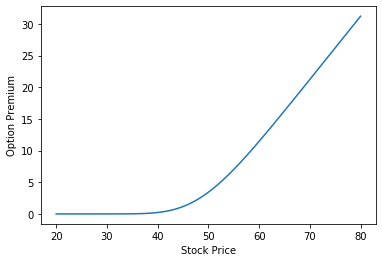

In [84]:
plt.plot(stockPrices, value)
plt.xlabel("Stock Price")
plt.ylabel("Option Premium")

In [85]:
dividendYields = np.linspace(10,150,100)/10000

In [86]:
value = callOption.value(valueDate, stockPrice, discountCurve, dividendYields, model)

Text(0, 0.5, 'Option Premium')

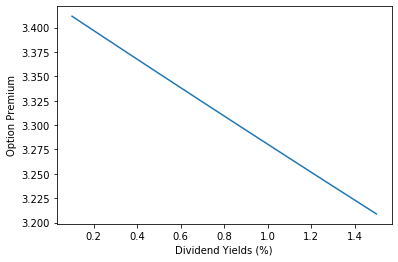

In [87]:
plt.plot(dividendYields*100, value)
plt.xlabel("Dividend Yields (%)")
plt.ylabel("Option Premium")

## Risk Measures using Vectorisations

In [88]:
deltas = callOption.delta(valueDate, stockPrices, discountCurve, dividendYield, model)

Text(0, 0.5, 'Option Deltas')

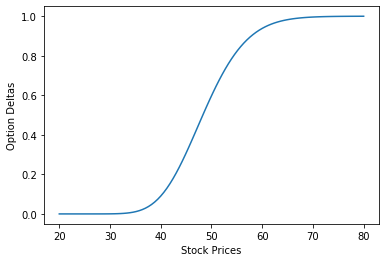

In [89]:
plt.plot(stockPrices, deltas)
plt.xlabel("Stock Prices")
plt.ylabel("Option Deltas")

In [90]:
gammas = callOption.gamma(valueDate, stockPrices, discountCurve, dividendYield, model)

Text(0, 0.5, 'Option Gamma')

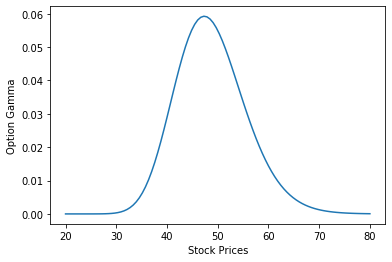

In [91]:
plt.plot(stockPrices, gammas)
plt.xlabel("Stock Prices")
plt.ylabel("Option Gamma")

In [92]:
thetas = callOption.theta(valueDate, stockPrices, discountCurve, dividendYield, model)

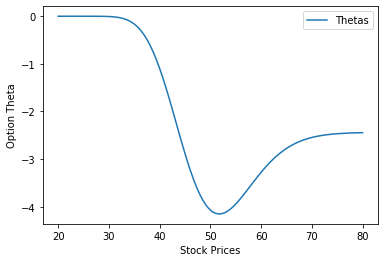

In [93]:
plt.plot(stockPrices, thetas, label="Thetas")
plt.xlabel("Stock Prices")
plt.ylabel("Option Theta")
plt.legend()

In [94]:
rhos = callOption.rho(valueDate, stockPrices, discountCurve, dividendYield, model)

Text(0, 0.5, 'Option Rho')

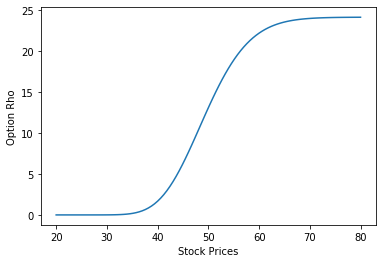

In [95]:
plt.plot(stockPrices, rhos)
plt.xlabel("Stock Prices")
plt.ylabel("Option Rho")

Copyright (c) 2020 Dominic O'Kane